# <span style="color:#563f46; font-family: Trebuchet MS; font-size: 50px; font-weight: bold;">Weather prediction with Deep Learning</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("weatherAUS.csv")
df = data.copy()

In [3]:
df.head(3)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   

   RainTomorrow  
0            No  
1            No  
2            No  

[3 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe().T

count         mean        std    min     25%     50%  \
MinTemp        143975.0    12.194034   6.398495   -8.5     7.6    12.0   
MaxTemp        144199.0    23.221348   7.119049   -4.8    17.9    22.6   
Rainfall       142199.0     2.360918   8.478060    0.0     0.0     0.0   
Evaporation     82670.0     5.468232   4.193704    0.0     2.6     4.8   
Sunshine        75625.0     7.611178   3.785483    0.0     4.8     8.4   
WindGustSpeed  135197.0    40.035230  13.607062    6.0    31.0    39.0   
WindSpeed9am   143693.0    14.043426   8.915375    0.0     7.0    13.0   
WindSpeed3pm   142398.0    18.662657   8.809800    0.0    13.0    19.0   
Humidity9am    142806.0    68.880831  19.029164    0.0    57.0    70.0   
Humidity3pm    140953.0    51.539116  20.795902    0.0    37.0    52.0   
Pressure9am    130395.0  1017.649940   7.106530  980.5  1012.9  1017.6   
Pressure3pm    130432.0  1015.255889   7.037414  977.1  1010.4  1015.2   
Cloud9am        89572.0     4.447461   2.887159    0.0     1.0     5.0   
Cloud3pm        86102.0     4.509930   2.720357    0.0     2.0     5.0   
Temp9am        143693.0    16.990631   6.488753   -7.2    12.3    16.7   
Temp3pm        141851.0    21.683390   6.936650   -5.4    16.6    21.1   

                  75%     max  
MinTemp          16.9    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7

In [6]:
df.shape

(145460, 23)

In [7]:
import missingno as msno

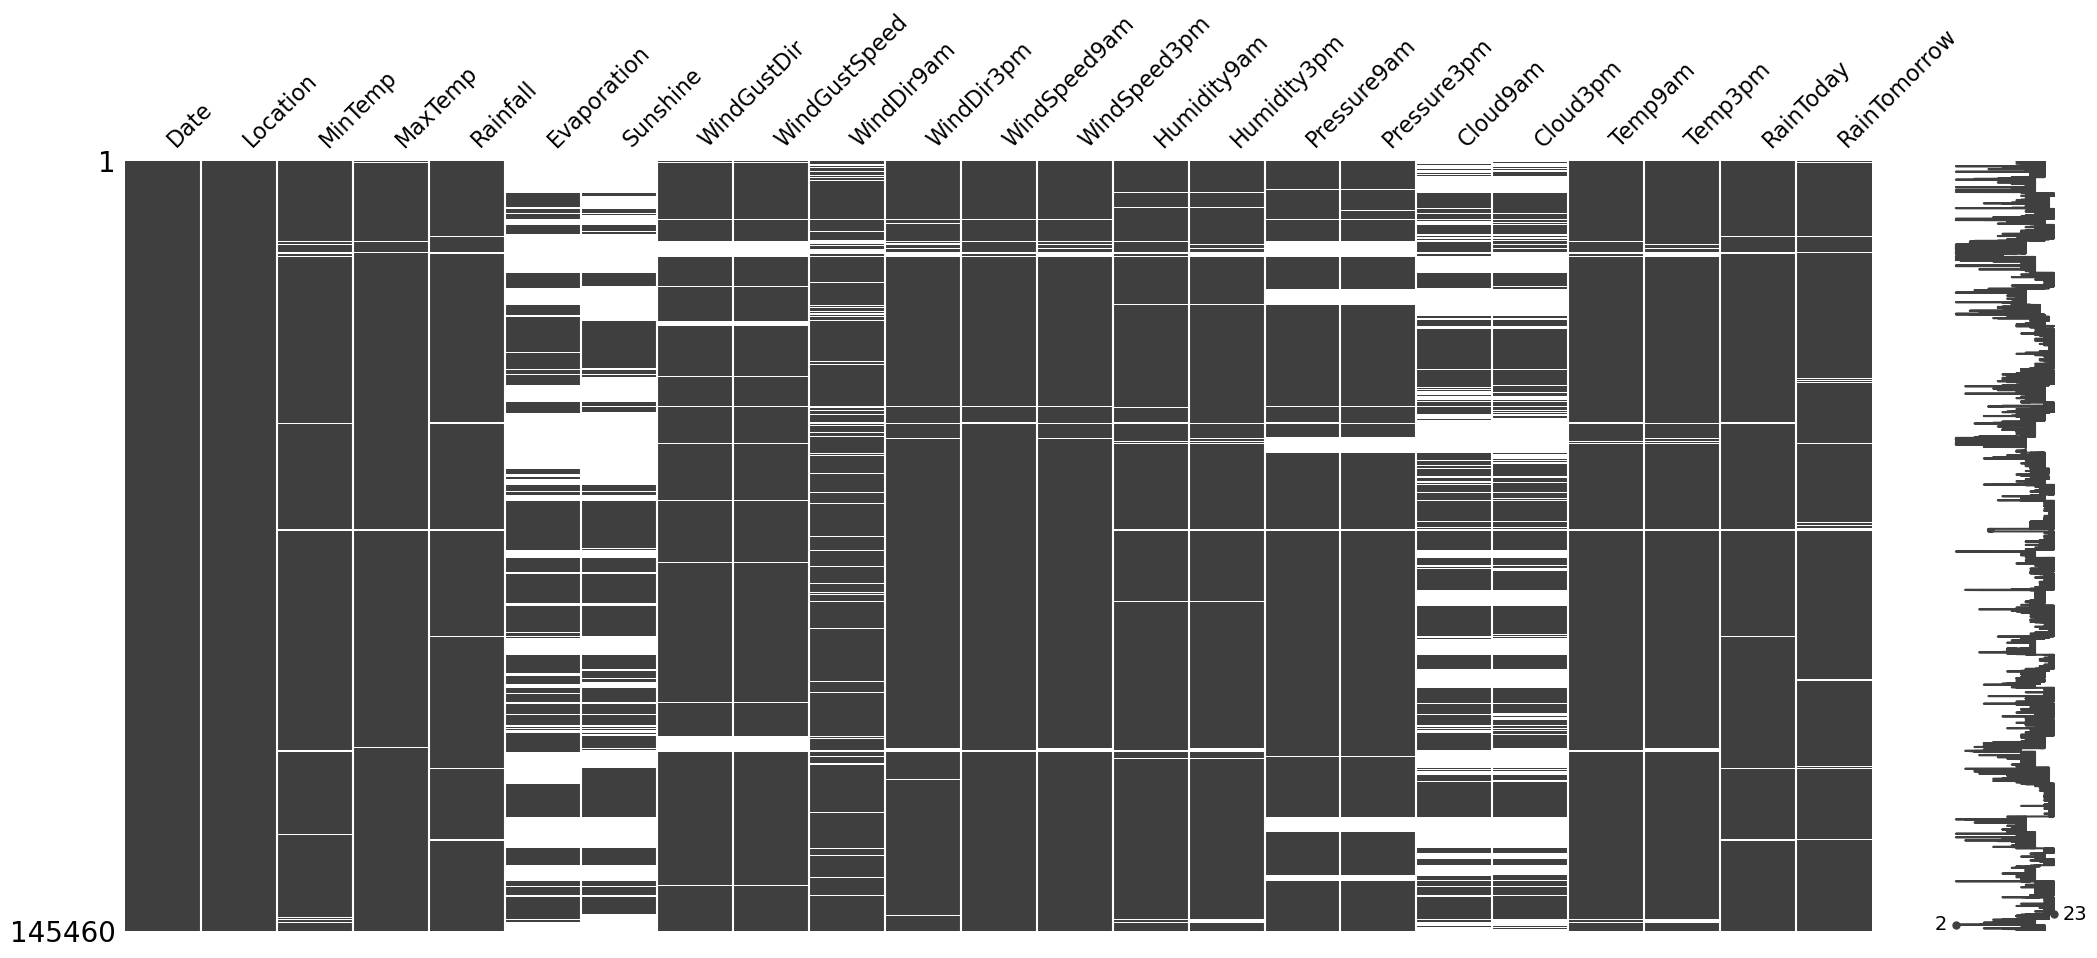

In [8]:
msno.matrix(df)
plt.show()

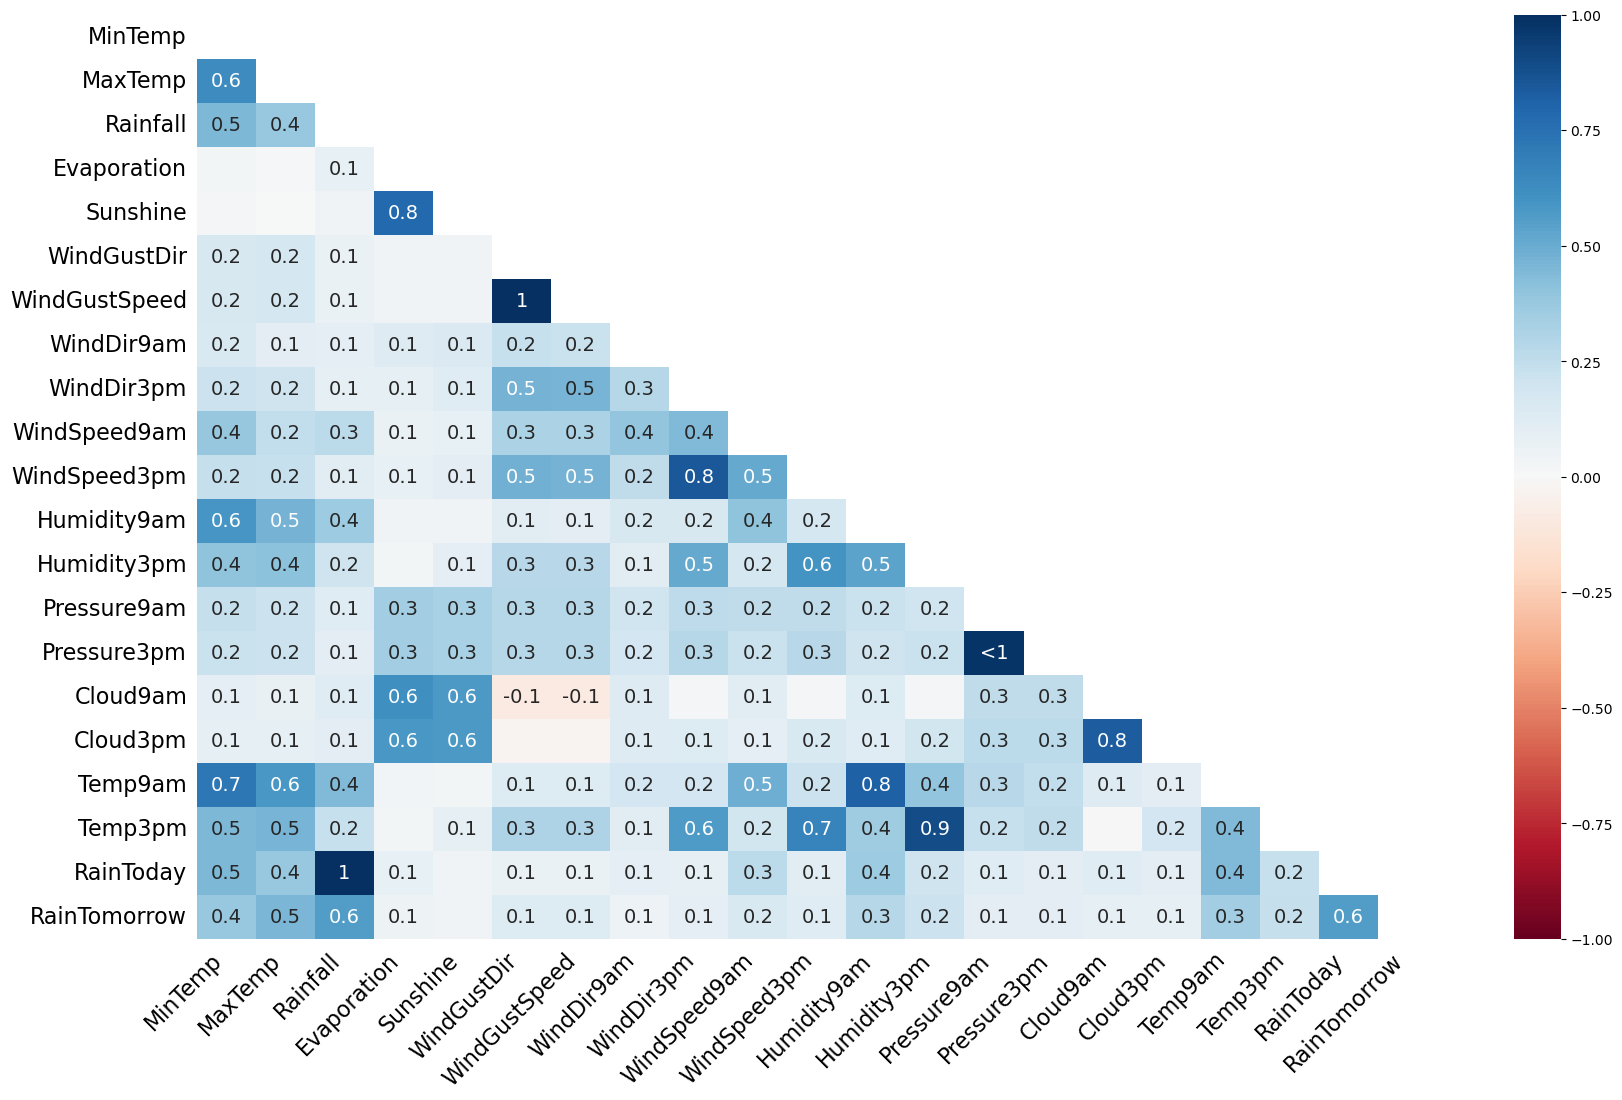

In [9]:
msno.heatmap(df)
plt.show()

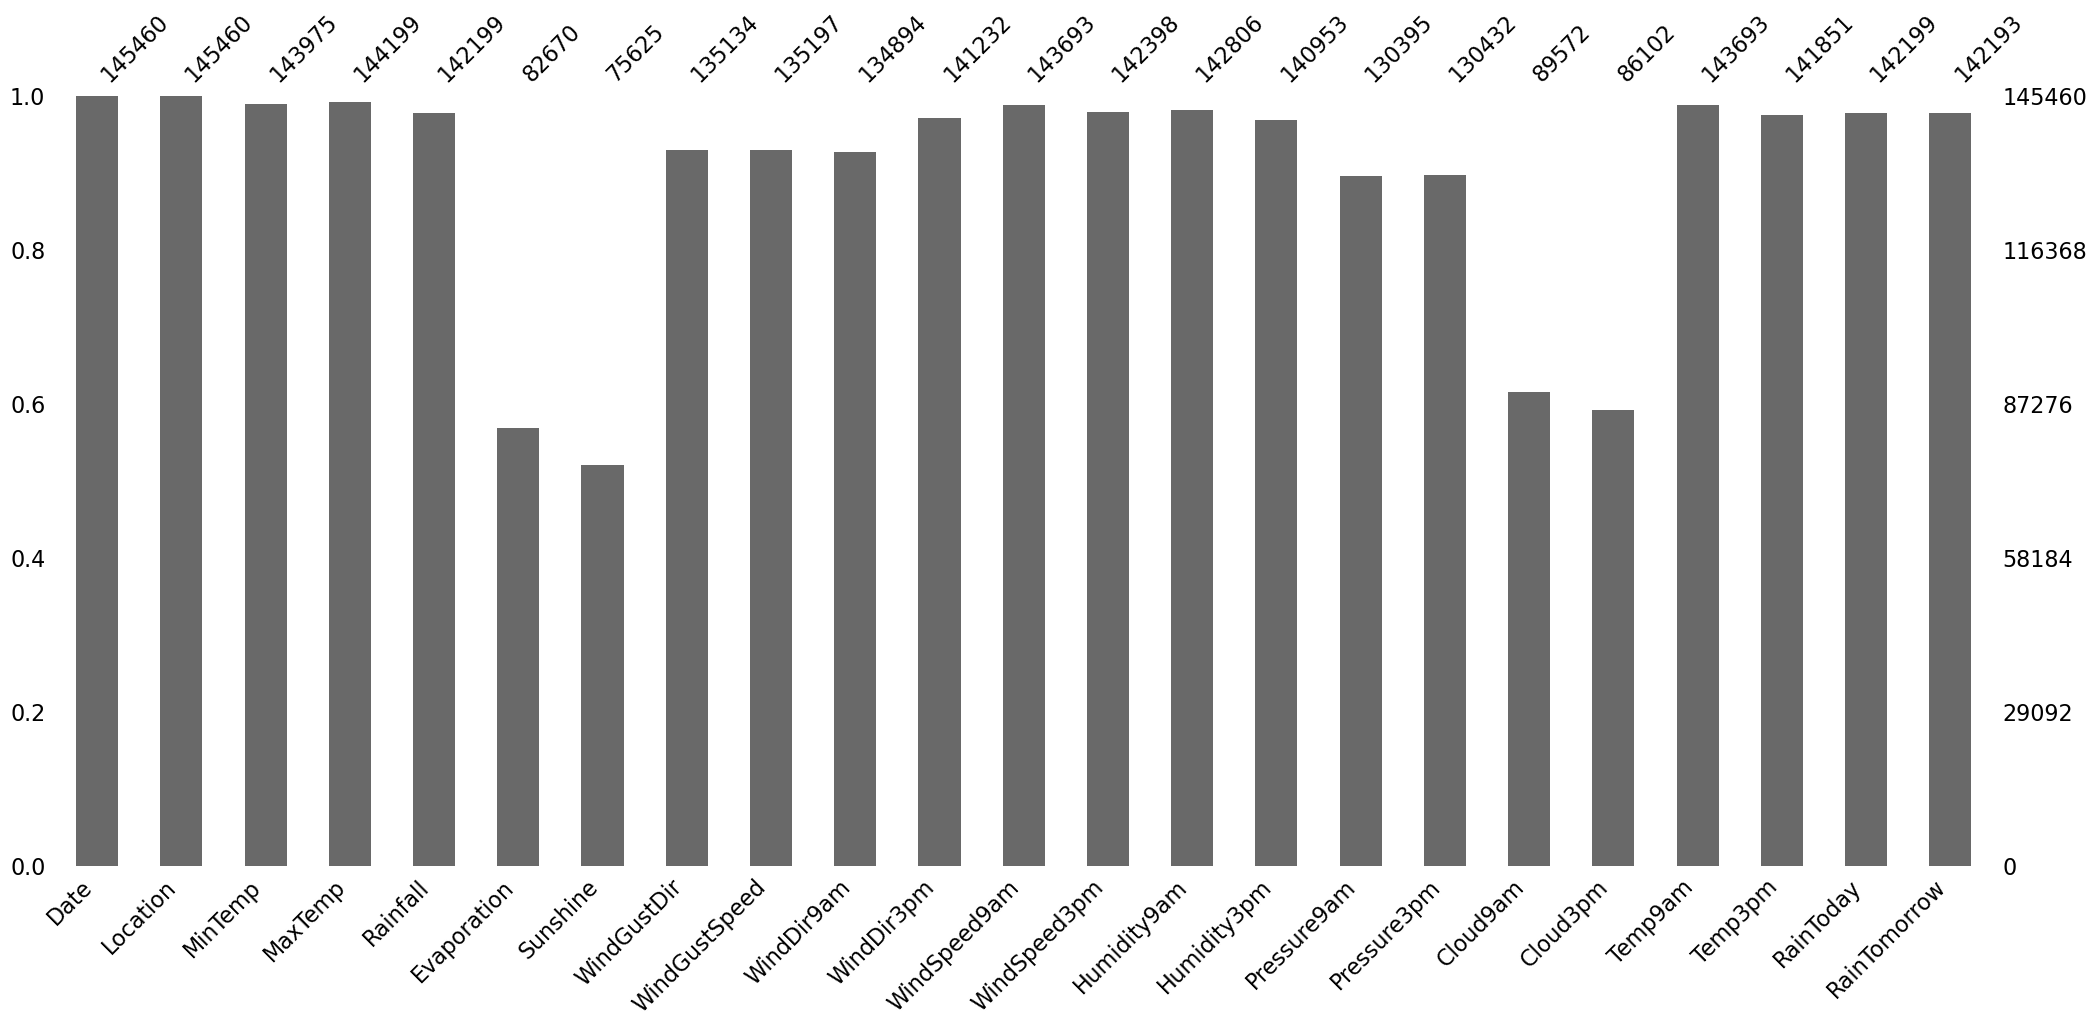

In [10]:
msno.bar(df)
plt.show()

In [11]:
#In the columns Evaporation, Sunshine, Cloud9am, Cloud3pm most of the values are null and that's why we will drop them
df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1, inplace = True)

In [12]:
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [13]:
x = 'RainTomorrow'

# Calculate value counts and percentages
value_counts = df[x].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Create a bar plot using Plotly Express
fig = px.bar(
    df, 
    x=value_counts.index, 
    y=value_counts.values, 
    title=x,
    labels={'x': x, 'y': 'Count'},
    text=percentages.round(2).astype(str) + '%'
)

# Add percentage labels on top of the bars
fig.update_traces(textposition='outside')

# Customize layout
fig.update_layout(
    xaxis_title=x,
    yaxis_title='Count',
    xaxis=dict(type='category'),  # Ensure x-axis treats the data as categorical
    yaxis=dict(type='linear'),    # Linear y-axis for count
    showlegend=False              # Hide the legend
)

# Show the interactive plot
fig.show()

In [14]:
for i in df.columns :
    if df[i].dtype == object:
        df[i][df[i].isnull()] = df[i].mode()
    else :
        df[i][df[i].isnull()] = df[i].median() 
df.dropna(axis = 0, inplace=True)

In [15]:
#We have finally removed all the null values
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           123710 non-null  object 
 1   Location       123710 non-null  object 
 2   MinTemp        123710 non-null  float64
 3   MaxTemp        123710 non-null  float64
 4   Rainfall       123710 non-null  float64
 5   WindGustDir    123710 non-null  object 
 6   WindGustSpeed  123710 non-null  float64
 7   WindDir9am     123710 non-null  object 
 8   WindDir3pm     123710 non-null  object 
 9   WindSpeed9am   123710 non-null  float64
 10  WindSpeed3pm   123710 non-null  float64
 11  Humidity9am    123710 non-null  float64
 12  Humidity3pm    123710 non-null  float64
 13  Pressure9am    123710 non-null  float64
 14  Pressure3pm    123710 non-null  float64
 15  Temp9am        123710 non-null  float64
 16  Temp3pm        123710 non-null  float64
 17  RainToday      123710 non-nul

In [17]:
# Data has no duplicates
# len(df) == len(df.drop_duplicates())

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
encoder = LabelEncoder()
for i in df.columns :
    if df[i].dtype == object :
        df[i] = encoder.fit_transform(df[i])

In [20]:
df.head(3)

Date  Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0   377         1     13.4     22.9       0.6           13           44.0   
1   378         1      7.4     25.1       0.0           14           44.0   
2   379         1     12.9     25.7       0.0           15           46.0   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0          13          14          20.0          24.0         71.0   
1           6          15           4.0          22.0         44.0   
2          13          15          19.0          26.0         38.0   

   Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
0         22.0       1007.7       1007.1     16.9     21.8          0   
1         25.0       1010.6       1007.8     17.2     24.3          0   
2         30.0       1007.6       1008.7     21.0     23.2          0   

   RainTomorrow  
0             0  
1             0  
2             0

In [21]:
# Splitting into the data
X = df.drop('RainTomorrow', axis = 1)
y = df.RainTomorrow.values.reshape(-1,1)

In [22]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [24]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [25]:
#Our dataset is imbalanced. We will use stratify to handle this issue so that the distribution of values for the label
#is equal in both training data and test data.
X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=123,
                                                     stratify = y,
#                                                      shuffle=True
                                                    )

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [27]:
#Converting numpy arrays to torch tensors
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

In [28]:
#Creating a tensor dataset
train_dataset = TensorDataset(X_train,y_train)
test_dataset = TensorDataset(X_test,y_test)

In [29]:
#Creating dataloader
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,shuffle=True)

In [30]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        
        self.fc1 = nn.Linear(18,35)
        self.out = nn.Linear(35,1)

    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = self.out(X)
        return X

In [31]:
model = Model()

In [32]:
def get_n_params (model) :
    pp = 0
    for p in list(model.parameters()) :
        nn = 1
        for s in list(p.size()) :
            nn = nn*s
        pp+=nn
    return pp

In [33]:
get_n_params(model)

701

In [34]:
#defining parametres
num_epochs = 15
lr_rate = 0.05
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(),lr=lr_rate)

In [35]:
# creating a supporting function
def binary_acc(y_pred,y_test) :
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc*100)
    return acc

In [36]:
#training the model 
model.train()
for e in range(1,num_epochs+1):
    epoch_loss = 0
    epoch_acc = 0 
    for X_batch,y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        
        loss = criterion(y_pred.flatten(),y_batch.flatten().float())
        acc = binary_acc(y_pred.flatten(),y_batch.flatten().float())
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    print(f'Epoch: {e+0:03}: |Loss:{epoch_loss/len(train_loader):.5f}|Acc: {epoch_acc/len(train_loader):.3f}')

Epoch: 001: |Loss:0.39787|Acc: 82.842
Epoch: 002: |Loss:0.36533|Acc: 84.386
Epoch: 003: |Loss:0.35985|Acc: 84.584
Epoch: 004: |Loss:0.35651|Acc: 84.738
Epoch: 005: |Loss:0.35565|Acc: 84.789
Epoch: 006: |Loss:0.35332|Acc: 84.886
Epoch: 007: |Loss:0.35271|Acc: 84.854
Epoch: 008: |Loss:0.35193|Acc: 84.891
Epoch: 009: |Loss:0.35045|Acc: 84.947
Epoch: 010: |Loss:0.35025|Acc: 85.014
Epoch: 011: |Loss:0.34879|Acc: 85.055
Epoch: 012: |Loss:0.34800|Acc: 85.081
Epoch: 013: |Loss:0.34735|Acc: 85.098
Epoch: 014: |Loss:0.34671|Acc: 85.134
Epoch: 015: |Loss:0.34598|Acc: 85.174


In [37]:
#testing the model

y_pred_list = []
model.eval()
with torch.no_grad(): 
    for X_batch, y_batch in test_loader:
        torch.no_grad()
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.numpy())
        
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
accuracy_score(y_test,y_pred_list)

0.6889499636246059

In [40]:
print(confusion_matrix(y_test,y_pred_list))

[[16188  3076]
 [ 4620   858]]


In [41]:
print(classification_report(y_test,y_pred_list))

              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     19264
         1.0       0.22      0.16      0.18      5478

    accuracy                           0.69     24742
   macro avg       0.50      0.50      0.50     24742
weighted avg       0.65      0.69      0.67     24742

